In [1]:
#practice on https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url='https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv'
data=pd.read_csv(url)
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [2]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [3]:
def convert_time(s):
    df_time = pd.to_datetime(s)
    return (df_time.hour*60+df_time.minute)*60 + df_time.second
    
data = pd.read_csv(url,converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,3938,7731
1,32,M,3986,7768
2,31,M,4009,7842
3,38,M,3976,8025
4,31,M,3992,8039


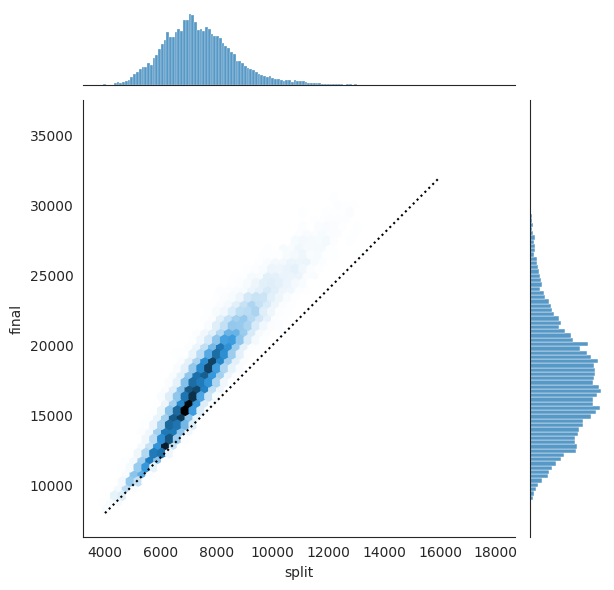

In [4]:
with sns.axes_style('white'):
    g = sns.jointplot(data=data, x="split", y="final", kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [5]:
data['split_frac'] = 1 - 2 * data['split'] / data['final']
data.head()

,age,gender,split,final,split_frac
0,33,M,3938,7731,-0.018756
1,32,M,3986,7768,-0.026262
2,31,M,4009,7842,-0.022443
3,38,M,3976,8025,0.009097
4,31,M,3992,8039,0.006842


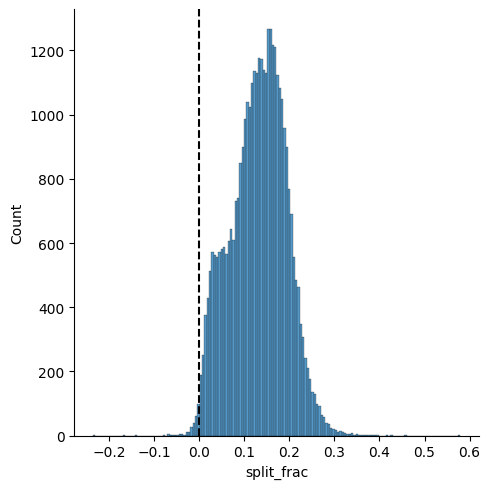

In [6]:
sns.displot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

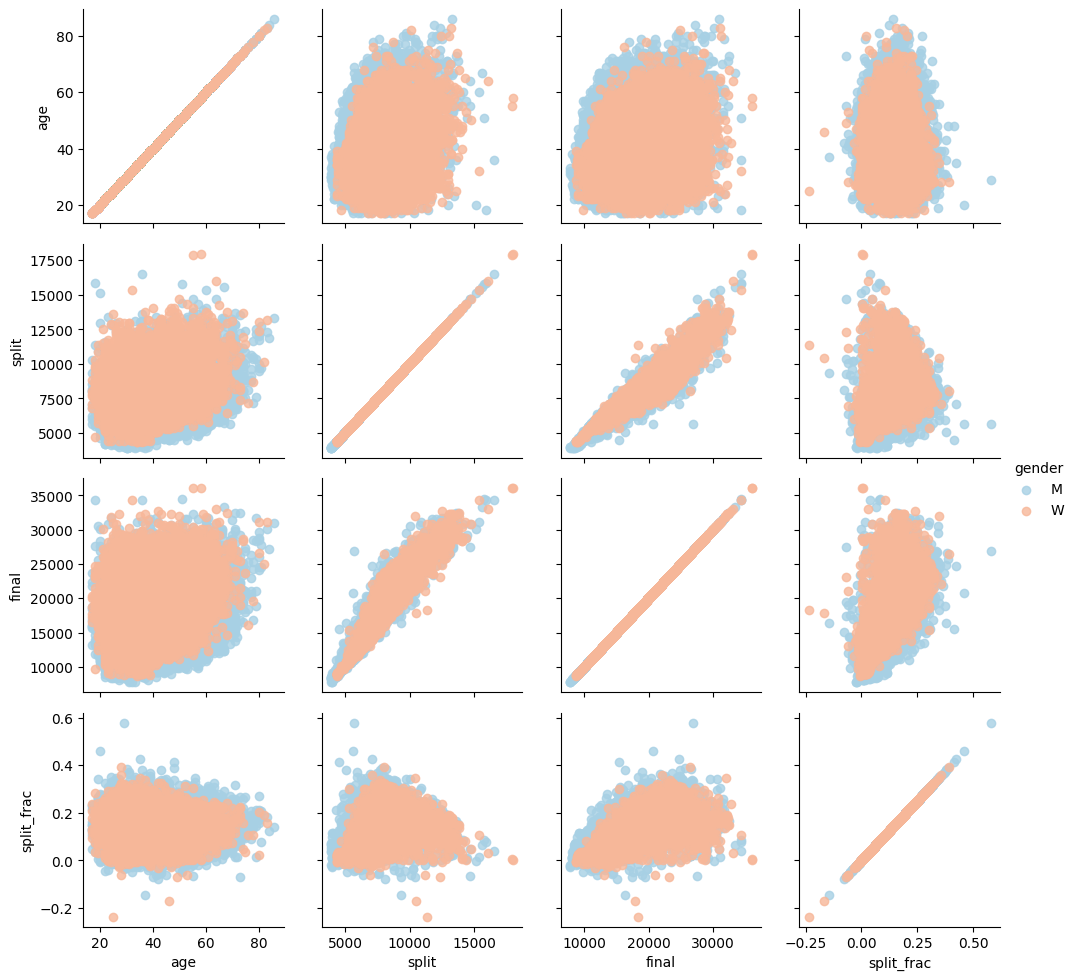

In [7]:
g = sns.PairGrid(data, vars=['age', 'split', 'final', 'split_frac'],hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();
#It looks like the split fraction does not correlate particularly with age, 
#but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time.